In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns


db= mysql.connector.connect(
    host='localhost',
    user='root',
    password='85213198',
    database='ecommerce'
)
cursor = db.cursor()



   List all unique cities where customers are located.

In [2]:
query = """SELECT distinct(customer_city) FROM customers"""
cursor.execute(query)
data = cursor.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

question 2 : Count the number of orders placed in 2017.

In [3]:
query = """SELECT count(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cursor.execute(query)
data = cursor.fetchall()
data[0][0]

135303

3. Find the total sales per category.

In [4]:
query = """select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""
cursor.execute(query)
data = cursor.fetchall()

df = pd.DataFrame(data, columns=['category', 'sales'])
df.sort_values(by='sales', ascending=False, inplace=True)
df


,category,sales
3,BED TABLE BATH,1712553.67
11,HEALTH BEAUTY,1657373.12
5,COMPUTER ACCESSORIES,1585330.45
1,FURNITURE DECORATION,1430176.39
15,WATCHES PRESENT,1429216.68
...,...,...
72,PC GAMER,2174.43
66,HOUSE COMFORT 2,1710.54
69,CDS MUSIC DVDS,1199.43
71,FASHION CHILDREN'S CLOTHING,785.67


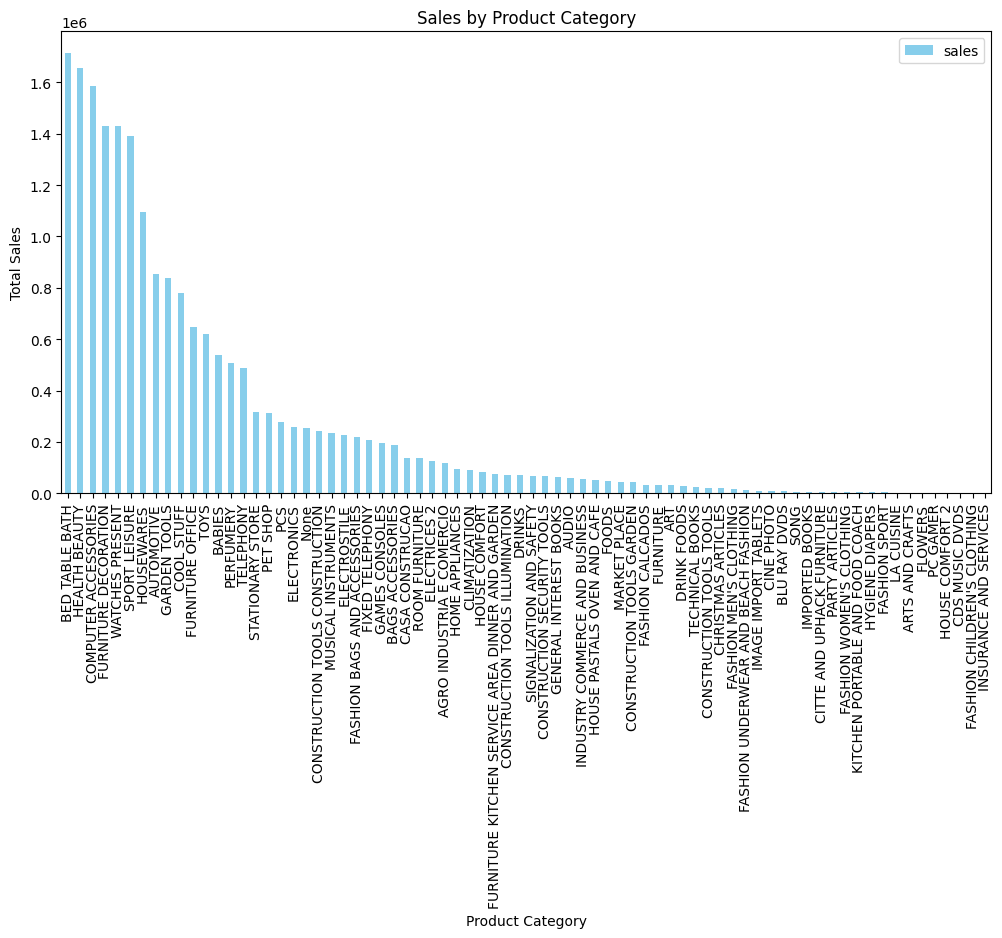

In [5]:
df.plot(kind='bar', x='category', y='sales', figsize=(12, 6), color='skyblue')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

4. Calculate the percentage of orders that were paid in installments.

In [21]:
query = """SELECT count(payment_installments) FROM payments"""
cursor.execute(query)
data = cursor.fetchall()
data




[(103886,)]

In [22]:
query = """SELECT(sum(case when payment_installments >= 1 then 1 else 0 end) * 100.0 / count(*)) as percentage FROM payments"""
cursor.execute(query)
data = cursor.fetchall()
data


[(Decimal('99.99807'),)]

5. Count the number of customers from each state. 

In [26]:
query = """Select customer_state, count(customer_id) from customers group by customer_state """
cursor.execute(query)
data = cursor.fetchall()
df =pd.DataFrame(data, columns=['customer_state', 'customer_count'])
df

,customer_state,customer_count
0,SP,125238
1,SC,10911
2,MG,34905
3,PR,15135
4,RJ,38556
5,RS,16398
6,PA,2925
7,GO,6060
8,ES,6099
9,BA,10140


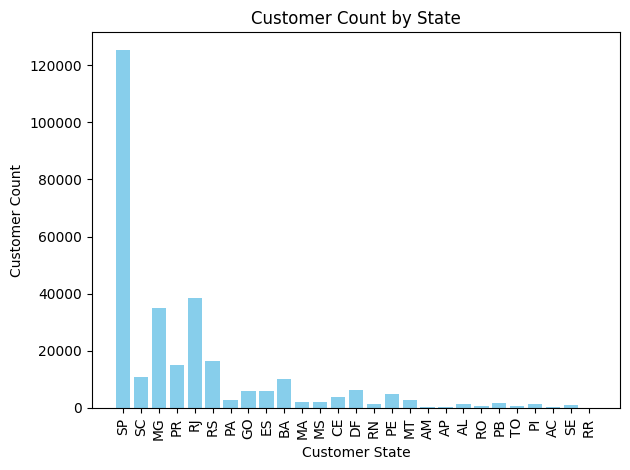

In [ ]:
plt.bar(df['customer_state'], df['customer_count'], color='skyblue')
plt.xlabel('Customer State')
plt.ylabel('Customer Count')
plt.title('Customer Count by State')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Calculate the number of orders per month in 2018.

In [46]:
query = """Select monthname (order_purchase_timestamp)months , count(order_id)order_count from orders where YEAR(order_purchase_timestamp) = 2018 group by months"""
cursor.execute(query)
data = cursor.fetchall()

df=pd.DataFrame(data, columns=['months', 'order_count'])
df



,months,order_count
0,July,18876
1,August,19536
2,February,20184
3,June,18501
4,March,21633
5,January,21807
6,May,20619
7,April,20817
8,September,48
9,October,12


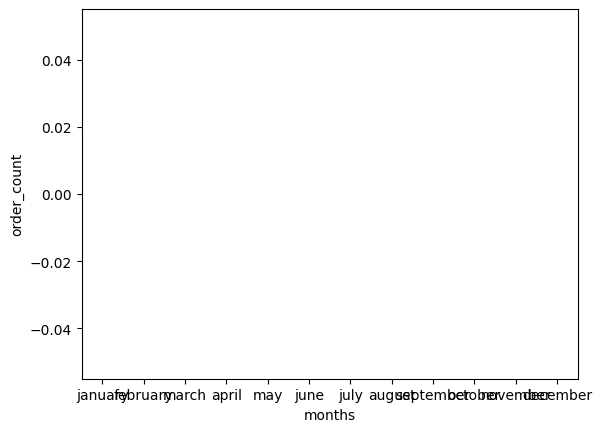

In [52]:
o = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
sns.barplot(x=df['months'], y=df['order_count'], order=o,data=df)

plt.show()